In [1]:
import yfinance as yf
game_stop = yf.Ticker("GME")

In [2]:
gme_data = game_stop.history(period="max")
gme_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-22 00:00:00-04:00,10.410000,10.450000,10.010000,10.010000,3261000,0.0,0.0
2024-04-23 00:00:00-04:00,10.050000,10.280000,10.010000,10.160000,2511800,0.0,0.0
2024-04-24 00:00:00-04:00,10.160000,10.940000,10.160000,10.930000,4829600,0.0,0.0


In [3]:
gme_data_index_reset = gme_data.reset_index(inplace = True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [4]:
import requests
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url).text
#html_data

In [6]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_data, 'html5lib')

In [7]:
soup.find_all("tbody")[1]
rows = soup.find_all('tr')
import pandas as pd
data = []
for row in rows[1:15]:  # Exclude the header row
    columns = row.find_all('td')
    date = columns[0].get_text()
    revenue = columns[1].get_text()
    data.append({'Date': date, 'Revenue': revenue})
gme_revenue = pd.DataFrame(data)
gme_revenue

,Date,Revenue
0,2020,"$6,466"
1,2019,"$8,285"
2,2018,"$8,547"
3,2017,"$7,965"
4,2016,"$9,364"
5,2015,"$9,296"
6,2014,"$9,040"
7,2013,"$8,887"
8,2012,"$9,551"
9,2011,"$9,474"


In [8]:
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"", regex=True)
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

In [9]:
gme_revenue.tail()

,Date,Revenue
9,2011,9474
10,2010,9078
11,2009,8806
12,2008,7094
13,2007,5319


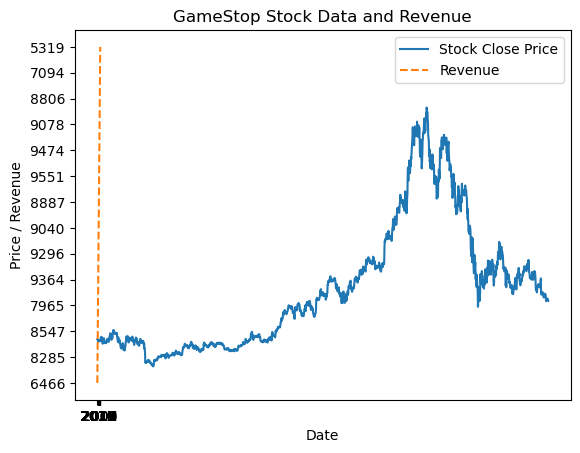

In [10]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, company_name):
    plt.plot(stock_data.index, stock_data['Close'], label='Stock Close Price')

    plt.plot(revenue_data['Date'], revenue_data['Revenue'], label='Revenue', linestyle='--')

    plt.title(f'{company_name} Stock Data and Revenue')
    plt.xlabel('Date')
    plt.ylabel('Price / Revenue')
    plt.legend()
    plt.show()
make_graph(gme_data.loc[:'2021-06'], gme_revenue, 'GameStop')